## Decision Trees

In [1]:
import pandas as pd
import numpy as np
import graphviz
import pydotplus
from sklearn.tree import DecisionTreeRegressor

In [2]:
from sklearn.model_selection import GridSearchCV,train_test_split
import warnings
warnings.filterwarnings('ignore')

In [3]:
import matplotlib.pyplot as plt

### Regression: 

Decision Trees for Regression
The dataset petrol_consumption.csv is taken from FSU dataset repository (http://people.sc.fsu.edu/~jburkardt/datasets/regression/x16.txt 

I,  the index;
A0, 1;
A1, the petrol tax;
A2, the per capita income;
A3, the number of miles of paved highway;
A4, the proportion of drivers;
B,  the consumption of petrol.

For this question, use this dataset to try and predict gas consumptions (in millions of gallons) in 48 US states based upon gas tax (in cents), per capita income (dollars), paved highways (in miles) and the proportion of population with a drivers license.

Use Decision Trees to build a regressor for the give data. Use Grid Search to find the optimal value for the hyperparameters, and evaluate your model on the appropriate metrics.


In [4]:
a=pd.read_csv(r"D:\petrol_consumption.csv")

In [5]:
a.shape #only 48 rows !

(48, 5)

In [6]:
a.head()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
0,9.0,3571,1976,0.525,541
1,9.0,4092,1250,0.572,524
2,9.0,3865,1586,0.580,561
3,7.5,4870,2351,0.529,414
4,8.0,4399,431,0.544,410


In [7]:
a.isna().sum() #no nulls

Petrol_tax                      0
Average_income                  0
Paved_Highways                  0
Population_Driver_licence(%)    0
Petrol_Consumption              0
dtype: int64

In [8]:
a.describe()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
count,48.000000,48.000000,48.000000,48.000000,48.000000
mean,7.668333,4241.833333,5565.416667,0.570333,576.770833
std,0.950770,573.623768,3491.507166,0.055470,111.885816
min,5.000000,3063.000000,431.000000,0.451000,344.000000
25%,7.000000,3739.000000,3110.250000,0.529750,509.500000
50%,7.500000,4298.000000,4735.500000,0.564500,568.500000
75%,8.125000,4578.750000,7156.000000,0.595250,632.750000
max,10.000000,5342.000000,17782.000000,0.724000,968.000000


In [9]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [10]:
import seaborn as sb

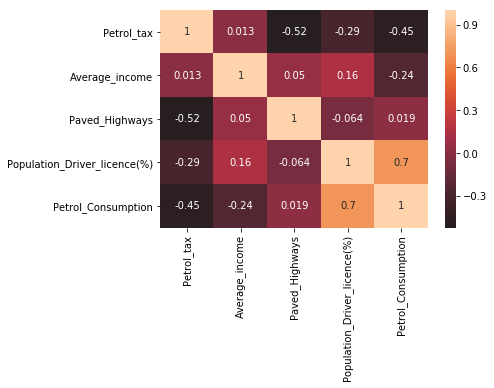

In [11]:
# correlation
pd.set_option('precision', 2)
c=a.corr(method='pearson')
sb.heatmap(c,annot=True,center =-0.6)
#When Petrol tax increases Consumption decreases, so does number of people opting to drive. 
#Some portion of the Petrol tax is usually used for Road maintenance and building new roads. 
#But when tax increases, people reduce consumption of petrol which inturn maybe reducing the amount going to making new roads.
#Petrol Tax seems to be highly -vely correlated to both %Drivers and No. of Paved Highways.
#Hence we can avoid it and see if performance improves.

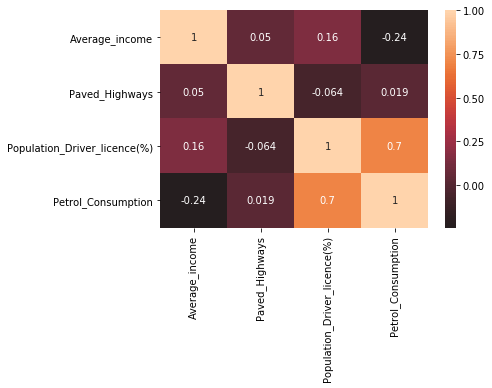

In [12]:
# correlation - remove petrol tax
pd.set_option('precision', 2)
c=a[[ 'Average_income', 'Paved_Highways',
       'Population_Driver_licence(%)', 'Petrol_Consumption']].corr(method='pearson')
sb.heatmap(c,annot=True,center =-0.3)
#Paved Highays seem to be correlated to the %Drivers too

In [13]:
a.columns

Index(['Petrol_tax', 'Average_income', 'Paved_Highways',
       'Population_Driver_licence(%)', 'Petrol_Consumption'],
      dtype='object')

## Model #1

In [14]:
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error

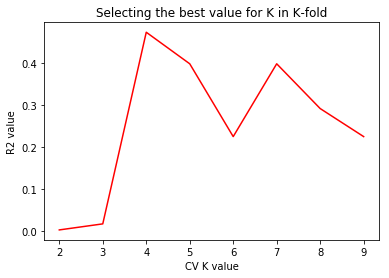

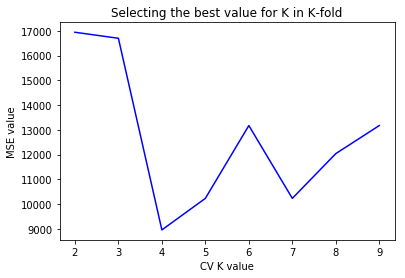

In [15]:
xtr,xts,ytr,yts=train_test_split(a[['Petrol_tax', 'Average_income', 'Paved_Highways','Population_Driver_licence(%)']], a['Petrol_Consumption'], test_size=0.2, random_state=100, shuffle=True)
params=[{
    'max_depth':[2,3,4,5,6,7],
    'min_samples_split':[2,3,4],
    'max_features': [1,2] #,3]    
}]

ks=[]
r2=[]
mae=[]
for x in range(2,10):
    gs=GridSearchCV(estimator=DecisionTreeRegressor(random_state=100),param_grid=params,cv=x)
    gs.fit(xtr,ytr)
    preds = gs.predict(xts)
    r2.append(r2_score(yts, preds))
    ks.append(x)
    mae.append(mean_squared_error(yts, preds))
    
plt.plot(ks,r2,"r-")
plt.title("Selecting the best value for K in K-fold")
plt.xlabel("CV K value")
plt.ylabel("R2 value")
plt.show()

plt.plot(ks,mae,"b-")
plt.title("Selecting the best value for K in K-fold")
plt.xlabel("CV K value")
plt.ylabel("MSE value")
plt.show()

#R2 is low ~ 0.47

In [16]:
gs=GridSearchCV(estimator=DecisionTreeRegressor(random_state=100),param_grid=params,cv=4)
gs.fit(xtr,ytr)
preds = gs.predict(xts)
r2score=r2_score(yts, preds)
mae_val=mean_squared_error(yts, preds)
print("R2:", r2score, "mean_squared_error : ", mae_val)
gs.best_params_

R2: 0.4733904443827267 mean_squared_error :  8949.708333333332


{'max_depth': 6, 'max_features': 2, 'min_samples_split': 2}

## Model #2 - Removing Petrol Tax

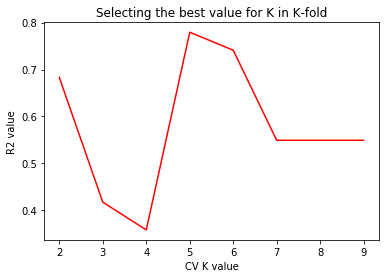

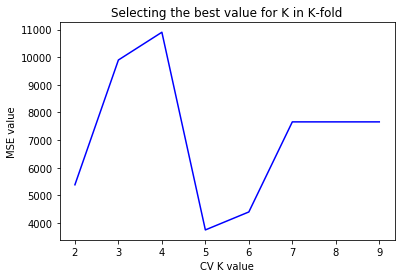

In [17]:
xtr,xts,ytr,yts=train_test_split(a[[ 'Average_income', 'Paved_Highways','Population_Driver_licence(%)']], a['Petrol_Consumption'], test_size=0.2, random_state=100, shuffle=True)
params=[{
    'max_depth':[2,3,4,5,6,7],
    'min_samples_split':[2,3,4],
    'max_features': [1,2] #,3]    
}]

ks=[]
r2=[]
mae=[]
for x in range(2,10):
    gs=GridSearchCV(estimator=DecisionTreeRegressor(random_state=100),param_grid=params,cv=x)
    gs.fit(xtr,ytr)
    preds = gs.predict(xts)
    r2.append(r2_score(yts, preds))
    ks.append(x)
    mae.append(mean_squared_error(yts, preds))
    
plt.plot(ks,r2,"r-")
plt.title("Selecting the best value for K in K-fold")
plt.xlabel("CV K value")
plt.ylabel("R2 value")
plt.show()

plt.plot(ks,mae,"b-")
plt.title("Selecting the best value for K in K-fold")
plt.xlabel("CV K value")
plt.ylabel("MSE value")
plt.show()
#R2 is ~ at 0.77 now !

In [18]:
gs=GridSearchCV(estimator=DecisionTreeRegressor(random_state=100),param_grid=params,cv=5)
gs.fit(xtr,ytr)
preds = gs.predict(xts)
r2score=r2_score(yts, preds)
mae_val=mean_squared_error(yts, preds)
print("R2:", r2score)
gs.best_params_

R2: 0.7794177701564172


{'max_depth': 5, 'max_features': 2, 'min_samples_split': 4}

## Model #3 - Removing Paved Highways and retain Petrol_Tax

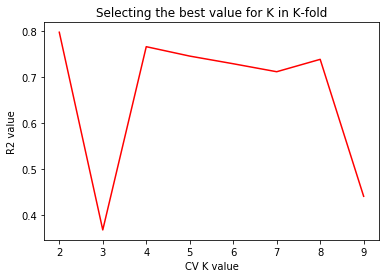

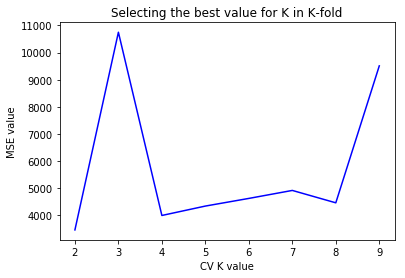

In [19]:
xtr,xts,ytr,yts=train_test_split(a[['Petrol_tax', 'Average_income', 'Population_Driver_licence(%)']], a['Petrol_Consumption'], test_size=0.2, random_state=100, shuffle=True)
params=[{
    'max_depth':[2,3,4,5] , #,6,7], #depth reduced
    'min_samples_split':[2,3,4],
    'max_features': [1,2,3]    
}]

ks=[]
r2=[]
mae=[]
for x in range(2,10):
    gs=GridSearchCV(estimator=DecisionTreeRegressor(random_state=100),param_grid=params,cv=x)
    gs.fit(xtr,ytr)
    preds = gs.predict(xts)
    r2.append(r2_score(yts, preds))
    ks.append(x)
    mae.append(mean_squared_error(yts, preds))
    
plt.plot(ks,r2,"r-")
plt.title("Selecting the best value for K in K-fold")
plt.xlabel("CV K value")
plt.ylabel("R2 value")
plt.show()

plt.plot(ks,mae,"b-")
plt.title("Selecting the best value for K in K-fold")
plt.xlabel("CV K value")
plt.ylabel("MSE value")
plt.show()
#R2 is only at 0.79

In [20]:
gs=GridSearchCV(estimator=DecisionTreeRegressor(random_state=100),param_grid=params,cv=2)
gs.fit(xtr,ytr)
preds = gs.predict(xts)
r2score=r2_score(yts, preds)
mae_val=mean_squared_error(yts, preds)
print("R2:", r2score)
gs.best_params_
#Final Model

R2: 0.7965977037375263


{'max_depth': 4, 'max_features': 1, 'min_samples_split': 4}

## Model #4 - Removing Paved Highways and Petrol_Tax

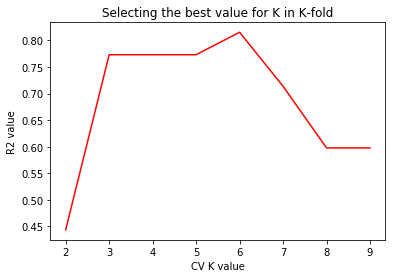

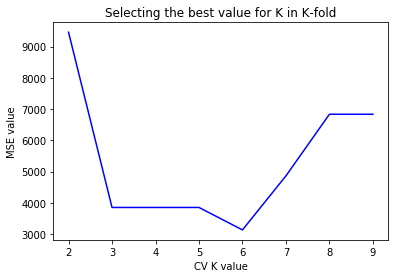

In [21]:
xtr,xts,ytr,yts=train_test_split(a[[ 'Average_income', 'Population_Driver_licence(%)']], a['Petrol_Consumption'], test_size=0.2, random_state=100, shuffle=True)
params=[{
    'max_depth':[2,3,4,5] , #,6,7], #depth reduced
    'min_samples_split':[2,3,4],
    'max_features': [1,2] #,3]    
}]

ks=[]
r2=[]
mae=[]
for x in range(2,10):
    gs=GridSearchCV(estimator=DecisionTreeRegressor(random_state=100),param_grid=params,cv=x)
    gs.fit(xtr,ytr)
    preds = gs.predict(xts)
    r2.append(r2_score(yts, preds))
    ks.append(x)
    mae.append(mean_squared_error(yts, preds))
    
plt.plot(ks,r2,"r-")
plt.title("Selecting the best value for K in K-fold")
plt.xlabel("CV K value")
plt.ylabel("R2 value")
plt.show()

plt.plot(ks,mae,"b-")
plt.title("Selecting the best value for K in K-fold")
plt.xlabel("CV K value")
plt.ylabel("MSE value")
plt.show()
#R2 is ~ at 0.81 now !

In [22]:
gs=GridSearchCV(estimator=DecisionTreeRegressor(random_state=100),param_grid=params,cv=6)
gs.fit(xtr,ytr)
preds = gs.predict(xts)
r2score=r2_score(yts, preds)
mae_val=mean_squared_error(yts, preds)
print("R2:", r2score)
gs.best_params_
#Final Model !

R2: 0.8155240072735129


{'max_depth': 5, 'max_features': 2, 'min_samples_split': 3}

In [23]:
from sklearn.tree import export_graphviz

In [24]:
eg=export_graphviz(gs.best_estimator_, filled=True, rounded=True, feature_names=xtr.columns, out_file=None)

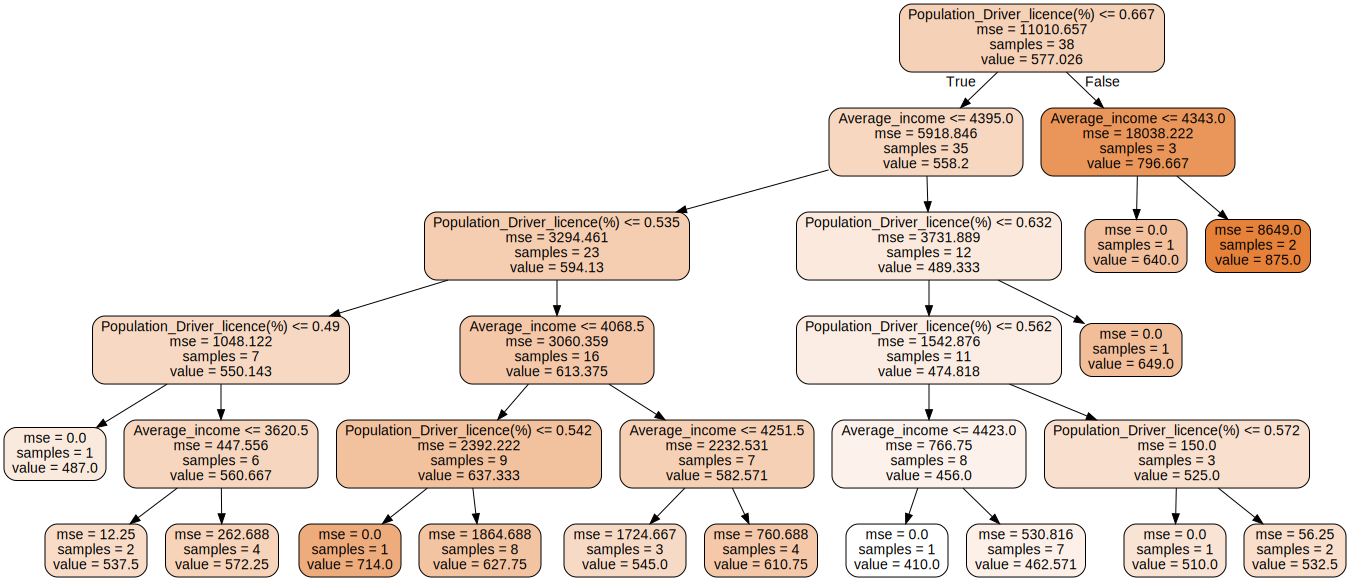

In [25]:
graphviz.Source(eg)

In [26]:
np.unique(preds) #predicted values show same values as above graph

array([462.57142857, 510.        , 532.5       , 537.5       ,
       545.        , 627.75      , 875.        ])

In [27]:
from pydotplus import graph_from_dot_data
graph = graph_from_dot_data(eg)
graph.write_png(r"D:\Jigsaw\UC python\ass5\My_DT_Regressor_tree.png")

True

## Classification: 

Decision Trees for Classification
The bill_authentication.csv file is taken from UCI Machine Learning repository (https://archive.ics.uci.edu/ml/datasets/banknote+authentication 

Use this dataset to predict whether a bank note is authentic or fake depending upon the four different attributes of the image of the note. The attributes are Variance of wavelet transformed image, curtosis of the image, entropy, and skewness of the image.

Use Decision Trees to build a classifier for the give data. Use Grid Search to find the optimal value for the hyperparameters, and evaluate your model on suitable metrics. Show all of your work.

In [28]:
b=pd.read_csv(r"D:\Jigsaw\UC python\ass5\bill_authentication.csv")

In [29]:
b.head()

,Variance,Skewness,Curtosis,Entropy,Class
0,3.62,8.67,-2.81,-0.45,0
1,4.55,8.17,-2.46,-1.46,0
2,3.87,-2.64,1.92,0.11,0
3,3.46,9.52,-4.01,-3.59,0
4,0.33,-4.46,4.57,-0.99,0


(array([762.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 610.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

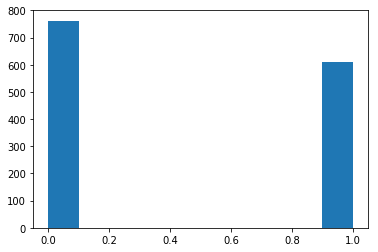

In [30]:
plt.hist(b['Class']) #skewed target

In [31]:
b['Class'].groupby(b['Class']).count() #skew not such an issue

Class
0    762
1    610
Name: Class, dtype: int64

In [32]:
from sklearn.tree import DecisionTreeClassifier

In [33]:
b.columns

Index(['Variance', 'Skewness', 'Curtosis', 'Entropy', 'Class'], dtype='object')

In [34]:
xtrb,xtsb,ytrb,ytsb=train_test_split(b[['Variance', 'Skewness', 'Curtosis', 'Entropy']], b['Class'], test_size=0.2, random_state=100,shuffle =True )

In [35]:
xtrb.shape, xtsb.shape

((1097, 4), (275, 4))

In [36]:
ytrb.shape, ytsb.shape

((1097,), (275,))

In [37]:
from sklearn.metrics import confusion_matrix,roc_auc_score, roc_curve,f1_score

In [38]:
params=[{
    'max_depth':[2,3,4,5,6],
    'min_samples_split':[2,3,4],
    'max_features': [1,2,3]    
}]

In [39]:
ksb=[]
aucb=[]
f1b=[]
for x in range(2,10):
    gsb=GridSearchCV(estimator=DecisionTreeClassifier(random_state=100),param_grid=params,cv=x, scoring="f1")
    gsb.fit(xtrb,ytrb)
    predsb = gsb.predict(xtsb)
    aucb.append(roc_auc_score(ytsb, predsb))
    ksb.append(x)
    f1b.append(f1_score(ytsb, predsb))

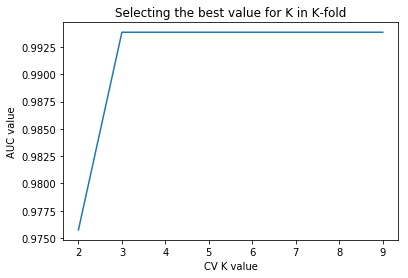

In [40]:
plt.plot(ksb,aucb)
plt.title("Selecting the best value for K in K-fold")
plt.xlabel("CV K value")
plt.ylabel("AUC value")
plt.show()

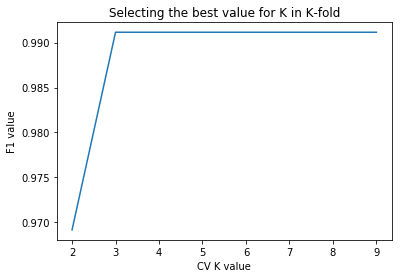

In [41]:
plt.plot(ksb,f1b)
plt.title("Selecting the best value for K in K-fold")
plt.xlabel("CV K value")
plt.ylabel("F1 value")
plt.show()

In [42]:
gsb=GridSearchCV(estimator=DecisionTreeClassifier(random_state=100),param_grid=params,cv=3,scoring="f1") #lets choose 3 - fold CV
gsb.fit(xtrb,ytrb)
preds = gsb.predict(xtsb)
f1score=f1_score(ytsb, predsb)
auc=roc_auc_score(ytsb, predsb)
print("F1:", f1score , " AUC: " ,auc )
gsb.best_params_

F1: 0.9911504424778761  AUC:  0.9938650306748466


{'max_depth': 6, 'max_features': 2, 'min_samples_split': 2}

In [43]:
pd.DataFrame(confusion_matrix(ytsb, predsb), index=['Actual neg','Actual pos'], columns=['Predicted neg','Predicted pos'] )

,Predicted neg,Predicted pos
Actual neg,161,2
Actual pos,0,112


In [44]:
egb=export_graphviz(gsb.best_estimator_, filled=True, rounded=True, feature_names=xtrb.columns, out_file=None)

In [45]:
graph = graph_from_dot_data(egb)
graph.write_png(r"D:\Jigsaw\UC python\ass5\My_DT_Classifier_tree.png")

True

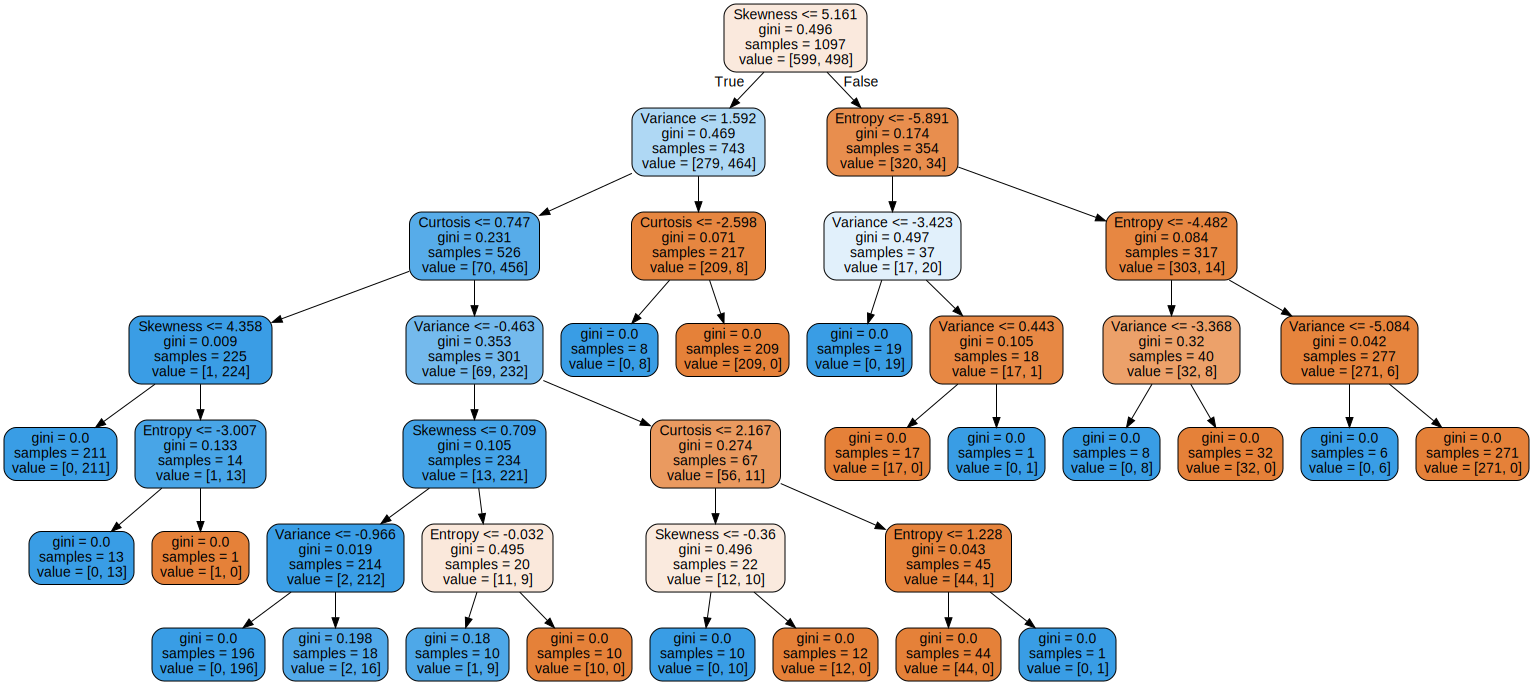

In [46]:
graphviz.Source(egb)

## Thank you !